<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15_i3-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-normal-n-0-6-9-15-r15.csv?token=AKVFSOBRQFV3ZGWOUENQMKC64IHTW')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-1-11-r15.csv?token=AKVFSOG4P3LJUCL4QCZX2HS64IHT4')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,4,2,0,0.0,4,59,1,59,59,0,16,3,27,1
1,7,3,0,1,1,4,3,9,15,15,23,7,6,2,0,0.0,4,61,1,61,61,0,24,3,27,0
2,80,0,3,4,1,1,5,17,23,7,15,15,4,2,2,1.0,12,58,2,59,116,0,16,20,340,1
3,81,0,3,4,2,2,5,17,23,7,15,15,4,2,2,1.0,13,57,3,59,171,0,64,20,340,1
4,82,0,3,4,3,2,5,17,23,7,15,15,4,2,2,1.0,14,56,4,59,224,0,96,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214129,3279241,3,0,5,2,2,3,11,15,15,27,11,60219,1,0,0.0,11,5,14,18,70,0,1204380,15,165,0
214130,3279248,3,0,5,3,2,3,11,15,15,27,11,60219,1,0,0.0,18,4,15,18,60,0,1806570,15,165,0
214131,3279255,3,0,5,4,2,3,11,15,15,27,11,60219,1,0,0.0,25,3,16,18,48,0,2408760,15,165,0
214132,3279262,3,0,5,5,3,3,11,15,15,27,11,60219,1,0,0.0,32,2,17,18,34,0,4516425,15,165,0


In [0]:
df.shape

(214134, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-1-12-r15.csv?token=AKVFSOHF734NBY65CTLE7FC64IHT6')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-1-7-r15.csv?token=AKVFSOEFVU32QE75VKKBXW264IHUE')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-11-12-r15.csv?token=AKVFSOEKVR7IMBRGAL7WZHS64IHUI')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-7-11-r15.csv?token=AKVFSOBS6YMYZI4SLRNMMJ264IHUM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r15/4-fft-malicious-n-0-6-9-15-m-7-12-r15.csv?token=AKVFSOA57BNEABRLUAD7OLC64IHUQ')

In [0]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(123100, 26)
(116955, 26)
(123544, 26)
(117691, 26)
(123780, 26)


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.479841,0.126705,-0.003016,0.004628,-0.687743,-0.611657,0.032664,-0.007067,-0.667936,-0.821596,0.006236,-0.002911,-0.012162,-0.011768,-0.007650,0.323749,0.079065,-0.371688,-0.618064,-0.017383
inport,-0.479841,1.000000,0.095256,0.004976,-0.007635,0.309035,0.174766,0.023192,0.146240,0.665073,0.849100,0.245881,-0.000441,-0.005944,-0.004985,0.002365,0.627866,0.032114,0.307031,0.296221,-0.043039
cache_coherence_type,0.126705,0.095256,1.000000,0.233985,-0.359026,-0.268244,-0.326198,0.048380,-0.040915,-0.021704,-0.045305,-0.259842,0.026215,-0.007660,0.014486,0.022308,0.235749,0.303146,0.729556,0.173042,-0.028538
flit_id,-0.003016,0.004976,0.233985,1.000000,0.010282,0.149538,0.121216,0.003597,0.017258,0.025503,0.009184,0.410947,-0.018125,0.006561,-0.009028,-0.007948,0.005196,0.647685,0.321428,0.255834,0.008374
flit_type,0.004628,-0.007635,-0.359026,0.010282,1.000000,-0.229450,-0.185993,-0.005519,-0.026480,-0.039131,-0.014091,0.464626,-0.026638,0.044891,0.014250,0.013835,-0.007973,0.146898,-0.493197,-0.392551,-0.012849
vnet,-0.687743,0.309035,-0.268244,0.149538,-0.229450,1.000000,0.961133,-0.057172,0.093683,0.476513,0.610733,-0.139241,-0.045483,-0.014614,-0.046920,-0.059441,-0.318675,-0.082083,0.463157,0.892448,0.052753
vc,-0.611657,0.174766,-0.326198,0.121216,-0.185993,0.961133,1.000000,-0.061817,0.059054,0.374713,0.485978,-0.149712,-0.044623,-0.004431,-0.038297,-0.052075,-0.391082,-0.105033,0.382246,0.863212,0.051739
traversal_id,0.032664,0.023192,0.048380,0.003597,-0.005519,-0.057172,-0.061817,1.000000,-0.032286,-0.014257,-0.004833,0.035805,0.158697,0.159673,0.248559,0.181121,0.060450,0.548472,0.003921,-0.039224,-0.326478
hop_count,-0.007067,0.146240,-0.040915,0.017258,-0.026480,0.093683,0.059054,-0.032286,1.000000,0.576250,0.213359,0.324030,-0.067466,-0.080725,-0.115696,-0.104858,0.010877,-0.028065,0.028868,0.056514,0.025151
current_hop,-0.667936,0.665073,-0.021704,0.025503,-0.039131,0.476513,0.374713,-0.014257,0.576250,1.000000,0.815877,0.368516,-0.026575,-0.036884,-0.049544,-0.040659,0.086097,-0.022557,0.318328,0.431380,0.000453


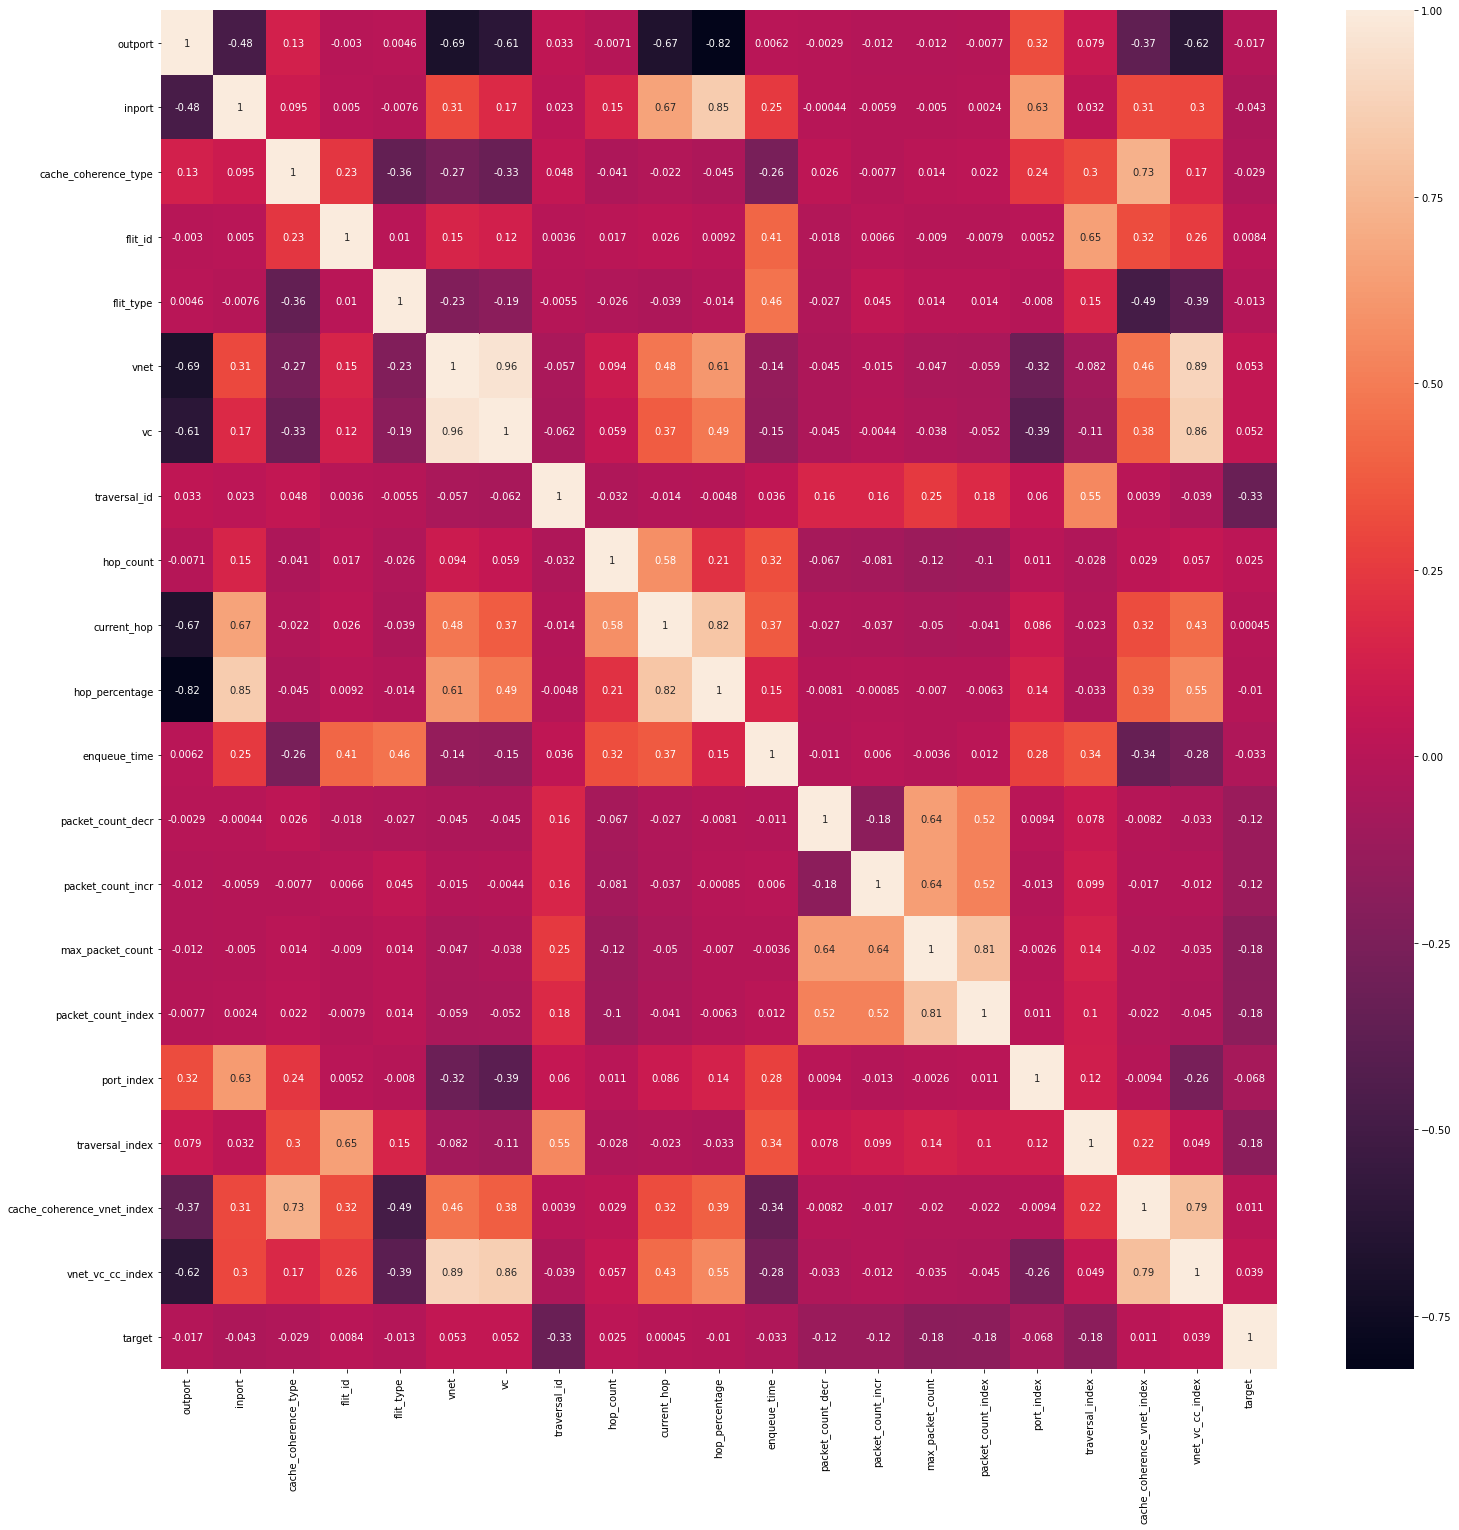

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

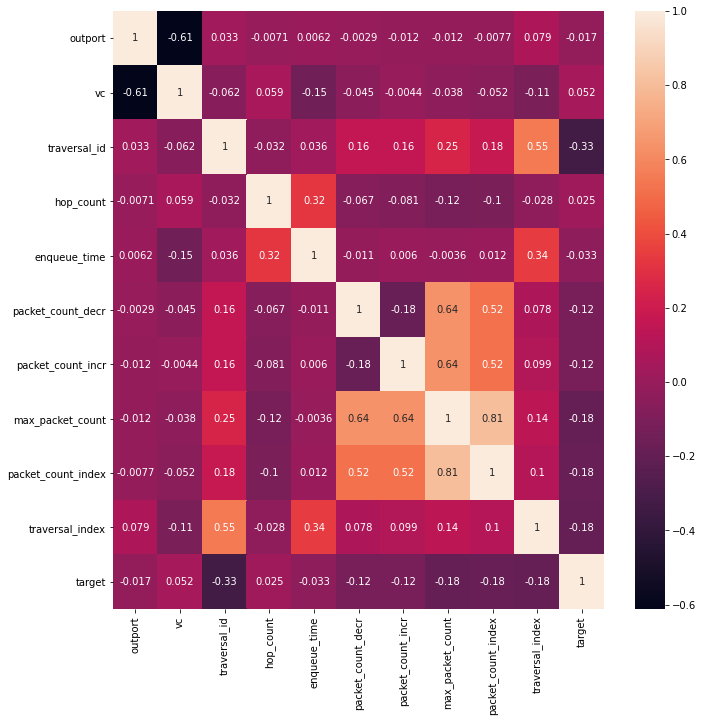

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

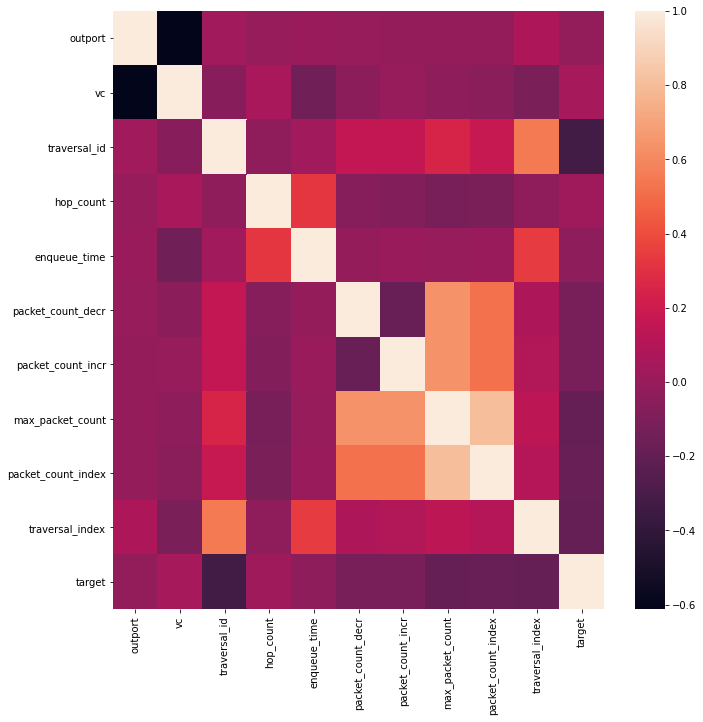

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000,0.000000,0.333333,0.000000,0.243697,0.000000,0.243697,0.004028,0.000000
1,0.75,0.000,0.000033,0.333333,0.000000,0.252101,0.000000,0.252101,0.004167,0.000001
2,0.00,1.000,0.000000,0.333333,0.112676,0.239496,0.004202,0.243697,0.007987,0.000000
3,0.00,1.000,0.000000,0.333333,0.126761,0.235294,0.008403,0.243697,0.011806,0.000009
4,0.00,1.000,0.000000,0.333333,0.140845,0.231092,0.012605,0.243697,0.015487,0.000015
...,...,...,...,...,...,...,...,...,...,...
214129,0.75,0.250,0.999983,0.166667,0.098592,0.016807,0.054622,0.071429,0.004792,0.222257
214130,0.75,0.250,0.999983,0.166667,0.197183,0.012605,0.058824,0.071429,0.004098,0.333387
214131,0.75,0.250,0.999983,0.166667,0.295775,0.008403,0.063025,0.071429,0.003264,0.444517
214132,0.75,0.250,0.999983,0.166667,0.394366,0.004202,0.067227,0.071429,0.002292,0.833471


In [0]:
train_X[train_X.duplicated()].shape

(0, 10)

In [0]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000,0.000017,0.333333,0.000000,0.296651,0.000000,0.296651,0.005571,7.378168e-07
1,0.75,0.000,0.000000,0.833333,0.127660,0.291866,0.004785,0.296651,0.011052,0.000000e+00
2,0.00,1.000,0.000017,0.333333,0.085106,0.287081,0.009569,0.296651,0.016354,7.378168e-07
3,0.00,1.000,0.000017,0.333333,0.095745,0.282297,0.014354,0.296651,0.021475,1.401852e-05
4,0.00,1.000,0.000017,0.333333,0.106383,0.277512,0.019139,0.296651,0.026417,2.287232e-05
...,...,...,...,...,...,...,...,...,...,...
123095,1.00,0.250,0.999983,0.500000,0.148936,0.019139,0.263158,0.282297,0.025070,3.333751e-01
123096,1.00,0.250,0.999983,0.500000,0.223404,0.014354,0.267943,0.282297,0.020397,4.445014e-01
123097,1.00,0.250,0.999983,0.500000,0.297872,0.009569,0.272727,0.282297,0.015545,8.334434e-01
123098,1.00,0.375,1.000000,0.500000,0.297872,0.004785,0.277512,0.282297,0.010513,4.444756e-02


In [0]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [0]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [0]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [0]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    116879
1     97255
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2447.321445
9     traversal_index   893.451618
8  packet_count_index   536.796786
7    max_packet_count   487.567062
6   packet_count_incr   251.241811
5   packet_count_decr   236.432756
1                  vc   210.064573
4        enqueue_time    17.764020
0             outport    16.992048
3           hop_count     9.809035


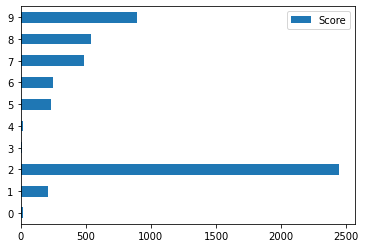

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.4052303982045
Test Prediction Score 98.01457581546734


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 81.1251015434606
Test Prediction Score 82.84040870420247
Test Prediction Score 82.75108463381467
Test Prediction Score 82.43875912346739
Test Prediction Score 80.24721279689773


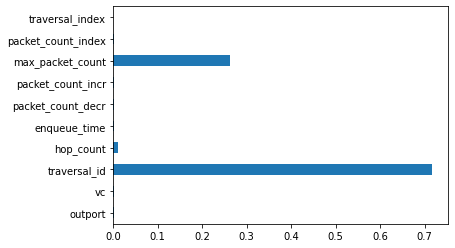

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

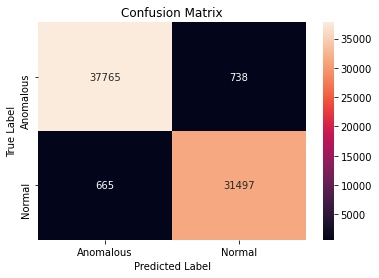

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     38503
           1       0.98      0.98      0.98     32162

    accuracy                           0.98     70665
   macro avg       0.98      0.98      0.98     70665
weighted avg       0.98      0.98      0.98     70665



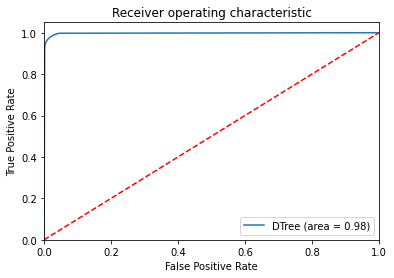

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r15l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.88537465506262


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.6864337936637
Test Prediction Score 84.54448292078149
Test Prediction Score 84.45331218027586
Test Prediction Score 84.94192419131454
Test Prediction Score 82.355792535143


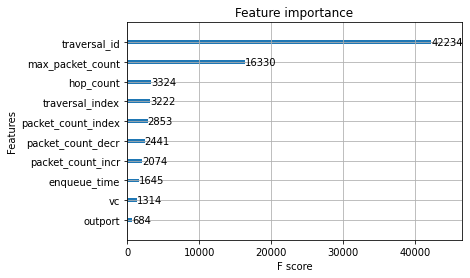

In [0]:
plot_importance(xgbc)
plt.show()

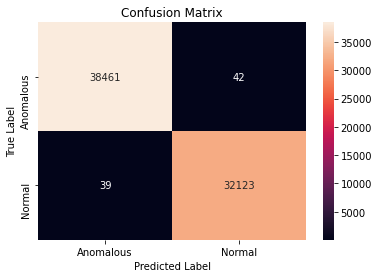

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38503
           1       1.00      1.00      1.00     32162

    accuracy                           1.00     70665
   macro avg       1.00      1.00      1.00     70665
weighted avg       1.00      1.00      1.00     70665



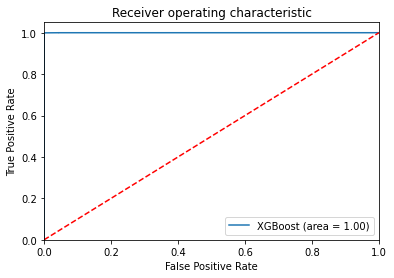

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()